[![Open in Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/Mic-73/AI/blob/main/HW7/HW7_Python.ipynb)


# Author: Michael Wood
### Purpose: Code for Assignment 7: NASA Asteroid Classification Problem,     create an MLPClassifier model that can classify an asteroid as Hazardous or Non-Hazardous (binary classification) as accurately as possible.
### Technial Report of assignment in HW7_Report.pdf under AI repository in HW7 folder in Github
### Class: AI, CSC 362, Spring 2024


## Preparing the Dataset

In [1]:
# Load required libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix
from google.colab import drive

In [2]:
# Load the dataset, get data file from Google Drive

drive.mount('/content/drive')
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/AI_ML_Datasets/nasa_asteroid.csv')

Mounted at /content/drive


In [14]:
# Extract training and test sets

# Define X and y, Drop non-relevant features ('Name', 'date', 'ID', etc.)
X = data.drop(['Close Approach Date',
               'Epoch Date Close Approach', 'Orbit Determination Date',
               'Orbiting Body', 'Equinox', 'Hazardous'], axis=1)
y = data['Hazardous']

# Split data into train and test sets
# Using 70%-30% rule
# Randomly shuffling the data
# Stratify data between 'True' and 'False' for 'Hazardous' in y
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, shuffle=True, stratify=y)

In [15]:
# Create an MLPClassifier without early stopping
# 2 hidden layers, 50 neurons each
mlp = MLPClassifier(hidden_layer_sizes=(50,50), max_iter=1000)

# Initialize lists to store training and test accuracies
train_accuracies = []
test_accuracies = []

# Scale the numeric features
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

In [65]:
# Extract training and test sets

# Define X and y, Drop non-relevant features ('Name', 'date', 'ID', etc.)
X = data.drop(['Neo Reference ID', 'Name', 'Close Approach Date',
               'Epoch Date Close Approach', 'Orbit Determination Date',
               'Orbiting Body', 'Orbit ID', 'Equinox', 'Hazardous'], axis=1)
y = data['Hazardous']

# Split data into train and test sets
# Using 70%-30% rule
# Randomly shuffling the data
# Stratify data between 'True' and 'False' for 'Hazardous' in y
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, shuffle=True, stratify=y)

## The MLPClassifier

In [66]:
# Create an MLPClassifier without early stopping
# 2 hidden layers, 50 neurons each
mlp = MLPClassifier(hidden_layer_sizes=(50,50), max_iter=1000)

# Initialize lists to store training and test accuracies
train_accuracies = []
test_accuracies = []

# Scale the numeric features
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

# Train the classifier and calculate accuracies at each iteration using partial_fit()
for i in range(1000):
    mlp.partial_fit(X_train_scaled, y_train, classes=np.unique(y_train))
    train_accuracies.append(mlp.score(X_train_scaled, y_train))
    test_accuracies.append(mlp.score(X_test_scaled, y_test))

## Classification Accuracy

In [67]:
# Calculate the overall training and test accuracies
train_accuracy = mlp.score(X_train_scaled, y_train)
test_accuracy = mlp.score(X_test_scaled, y_test)

# Print the overall training and test accuracies
print(f"Overall Training Accuracy: {train_accuracy}")
print(f"Overall Test Accuracy: {test_accuracy}")

Overall Training Accuracy: 1.0
Overall Test Accuracy: 0.9623312011371713


## Confusion Matrix

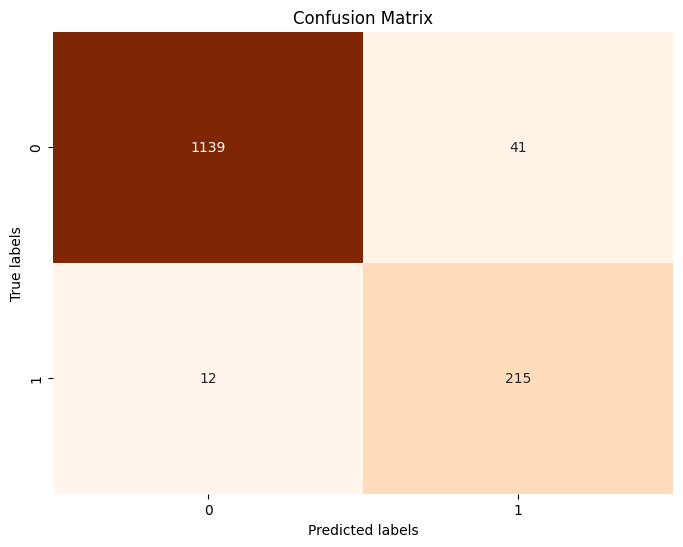

In [68]:
# Display the confusion matrix for the test set

# Get the predicted labels for the test set
y_pred = mlp.predict(X_test_scaled)

# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Display the confusion matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Oranges', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

## Train/Test/Validation Accuracy Plot

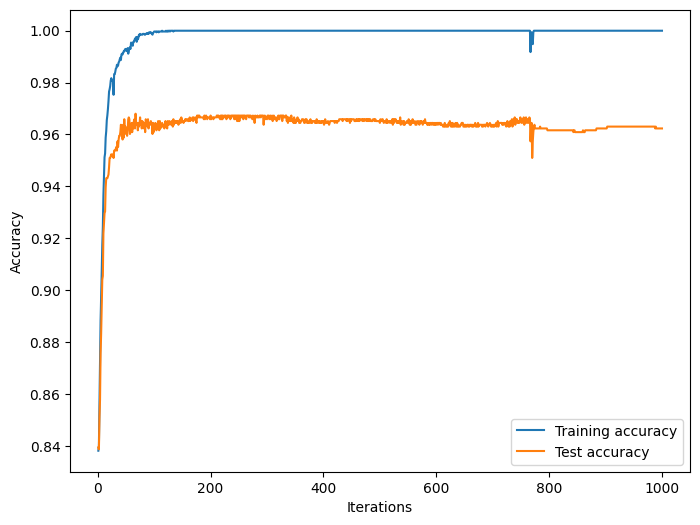

In [69]:
# Plot the training, validation, and test accuracies

plt.figure(figsize=(8, 6))
plt.plot(range(1, 1001), train_accuracies, label='Training accuracy')
plt.plot(range(1, 1001), test_accuracies, label='Test accuracy')
plt.xlabel('Iterations')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

## Loss Curve

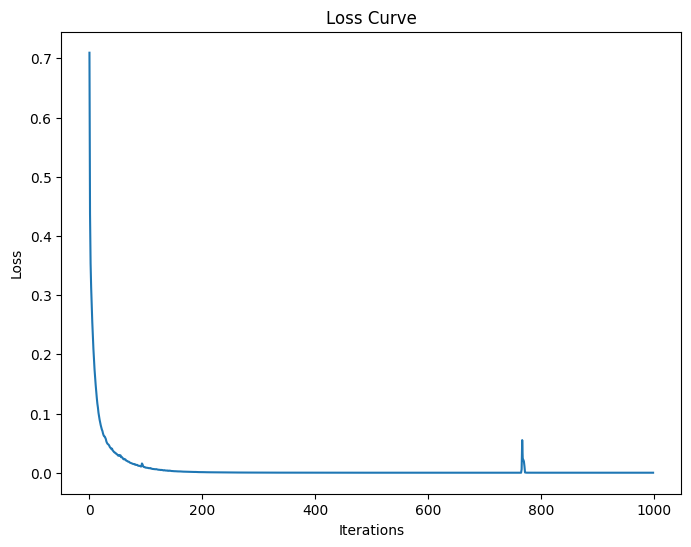

In [70]:
# Display the loss curve of the model

plt.figure(figsize=(8, 6))
plt.plot(mlp.loss_curve_)
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.title('Loss Curve')
plt.show()

## Different Hyperparameters

Overall Training Accuracy: 1.0
Overall Test Accuracy: 0.9715707178393745


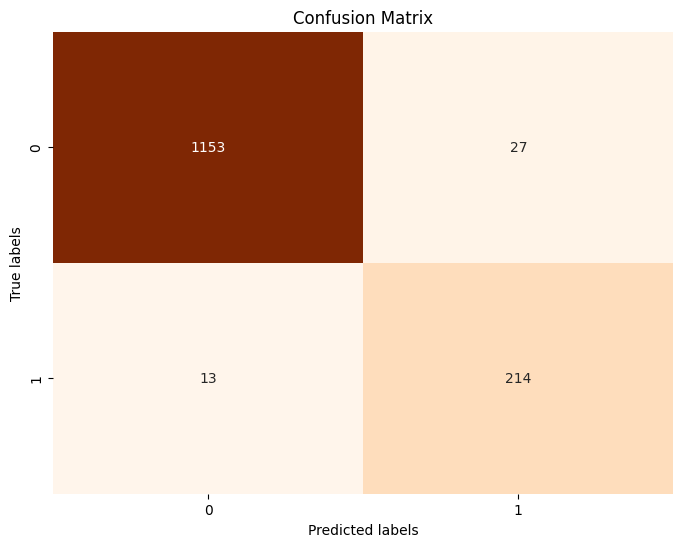

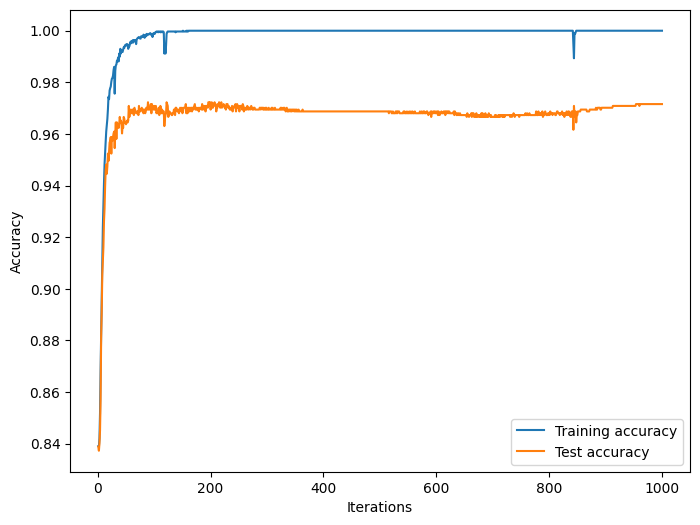

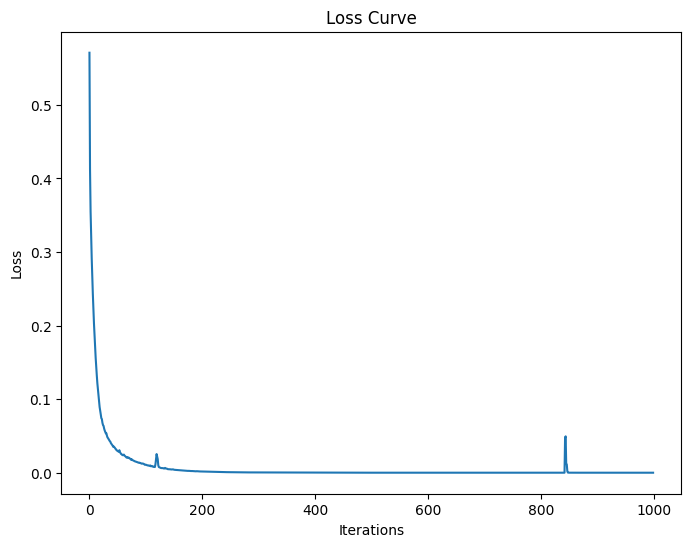

In [30]:
# Repeating the steps above but now with different hyperparameters
# First changing the number of neurons in hidden layers

# Extract training and test sets once again
X = data.drop(['Neo Reference ID', 'Name', 'Close Approach Date',
               'Epoch Date Close Approach', 'Orbit Determination Date',
               'Orbiting Body', 'Orbit ID', 'Equinox', 'Hazardous'], axis=1)
y = data['Hazardous']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, shuffle=True, stratify=y)

# CHANGE: 2 hidden layers, with 40 and 30 neurons, respectively
mlp = MLPClassifier(hidden_layer_sizes=(40,30), max_iter=1000)

# Repeat steps above from here

# Initilize train/test lists
train_accuracies = []
test_accuracies = []

# Scale
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

# Classifier
for i in range(1000):
    mlp.partial_fit(X_train_scaled, y_train, classes=np.unique(y_train))
    train_accuracies.append(mlp.score(X_train_scaled, y_train))
    test_accuracies.append(mlp.score(X_test_scaled, y_test))

# Overall Accuracy
train_accuracy = mlp.score(X_train_scaled, y_train)
test_accuracy = mlp.score(X_test_scaled, y_test)

print(f"Overall Training Accuracy: {train_accuracy}")
print(f"Overall Test Accuracy: {test_accuracy}")

# Confusion Matrix
y_pred = mlp.predict(X_test_scaled)

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Oranges', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

# Training/Test Accuracy Plot
plt.figure(figsize=(8, 6))
plt.plot(range(1, 1001), train_accuracies, label='Training accuracy')
plt.plot(range(1, 1001), test_accuracies, label='Test accuracy')
plt.xlabel('Iterations')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Loss Curve plot
plt.figure(figsize=(8, 6))
plt.plot(mlp.loss_curve_)
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.title('Loss Curve')
plt.show()

Overall Training Accuracy: 1.0
Overall Test Accuracy: 0.9694385216773277


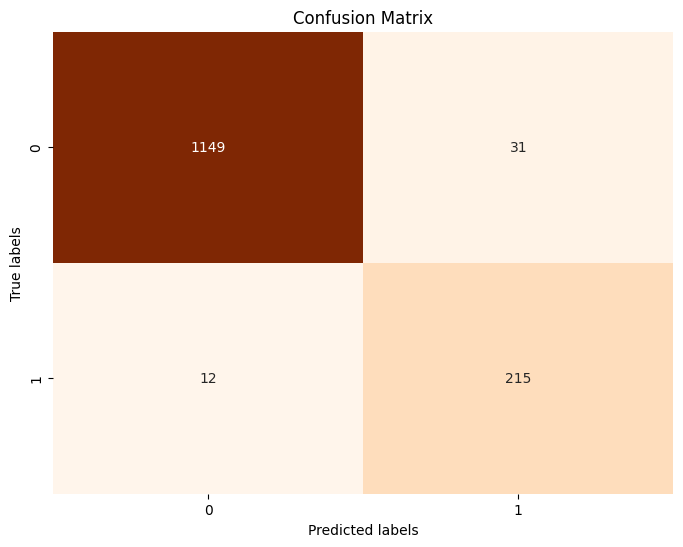

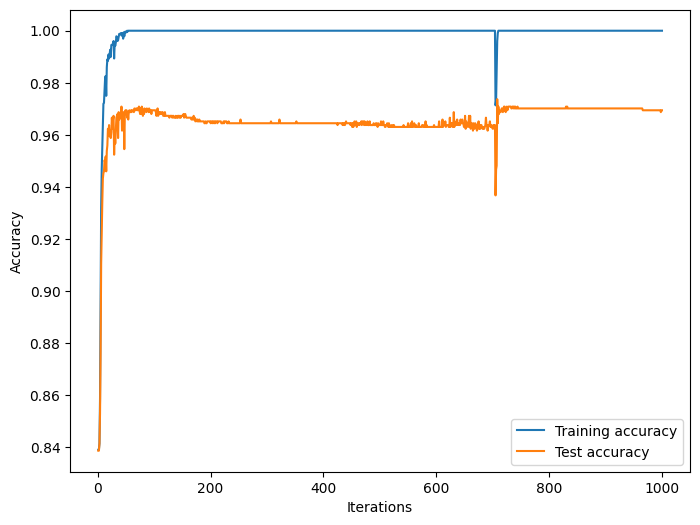

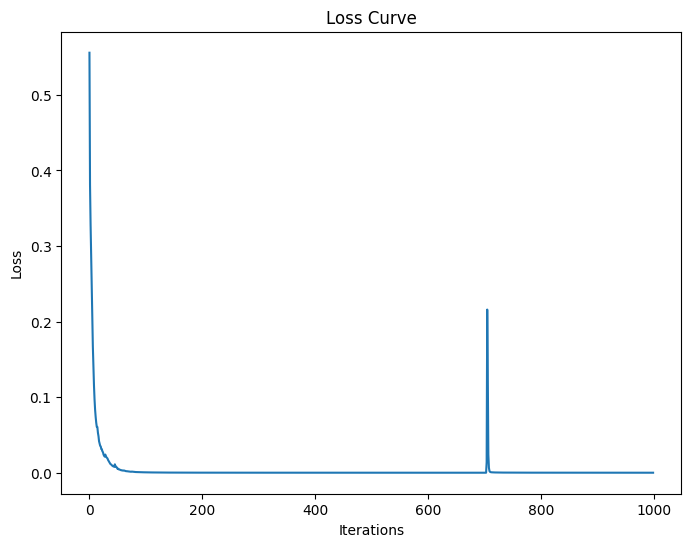

In [32]:
# Next changing the number of hidden layers

# Extract training and test sets once again
X = data.drop(['Neo Reference ID', 'Name', 'Close Approach Date',
               'Epoch Date Close Approach', 'Orbit Determination Date',
               'Orbiting Body', 'Orbit ID', 'Equinox', 'Hazardous'], axis=1)
y = data['Hazardous']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, shuffle=True, stratify=y)

# CHANGE: 3 hidden layers, each with 50 neurons
mlp = MLPClassifier(hidden_layer_sizes=(50,50,50), max_iter=1000)

# Repeat steps above from here

# Initilize train/test lists
train_accuracies = []
test_accuracies = []

# Scale
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

# Classifier
for i in range(1000):
    mlp.partial_fit(X_train_scaled, y_train, classes=np.unique(y_train))
    train_accuracies.append(mlp.score(X_train_scaled, y_train))
    test_accuracies.append(mlp.score(X_test_scaled, y_test))

# Overall Accuracy
train_accuracy = mlp.score(X_train_scaled, y_train)
test_accuracy = mlp.score(X_test_scaled, y_test)

print(f"Overall Training Accuracy: {train_accuracy}")
print(f"Overall Test Accuracy: {test_accuracy}")

# Confusion Matrix
y_pred = mlp.predict(X_test_scaled)

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Oranges', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

# Training/Test Accuracy Plot
plt.figure(figsize=(8, 6))
plt.plot(range(1, 1001), train_accuracies, label='Training accuracy')
plt.plot(range(1, 1001), test_accuracies, label='Test accuracy')
plt.xlabel('Iterations')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Loss Curve plot
plt.figure(figsize=(8, 6))
plt.plot(mlp.loss_curve_)
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.title('Loss Curve')
plt.show()

Overall Training Accuracy: 1.0
Overall Test Accuracy: 0.9715707178393745


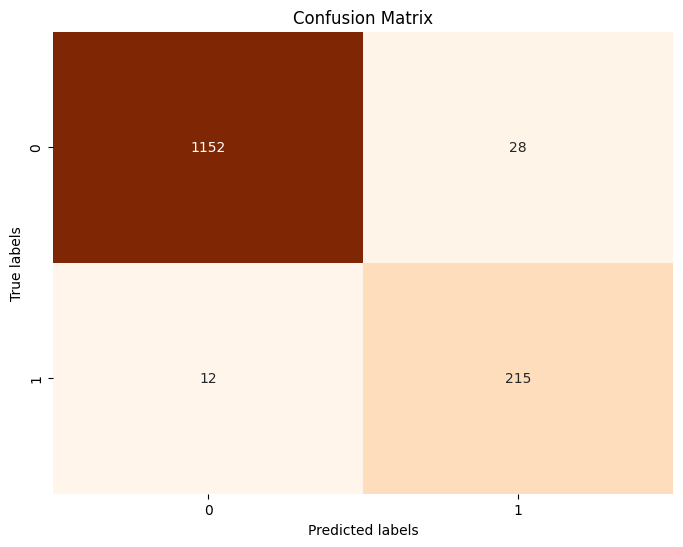

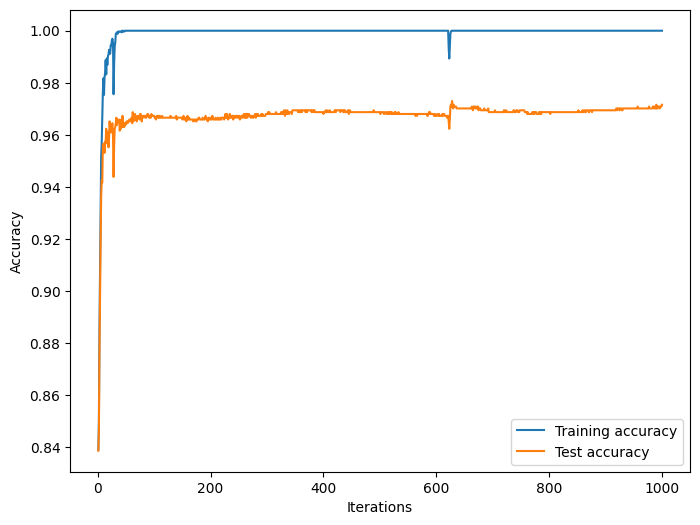

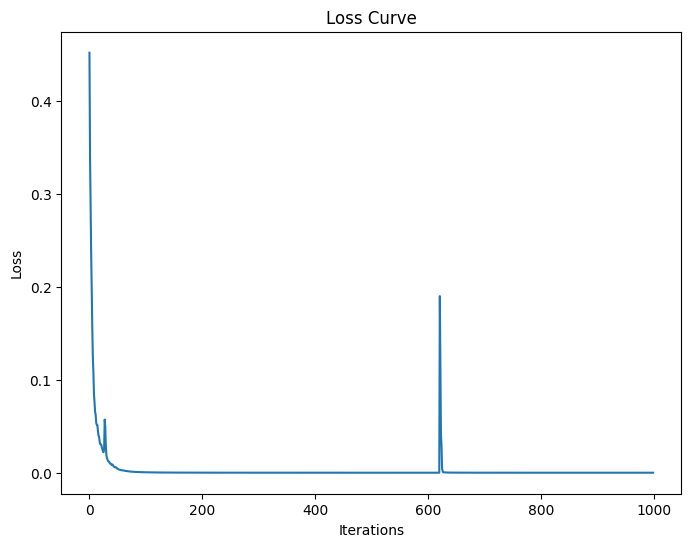

In [33]:
# Next changing both the number of hidden layers and number of neurons in each layer

# Extract training and test sets once again
X = data.drop(['Neo Reference ID', 'Name', 'Close Approach Date',
               'Epoch Date Close Approach', 'Orbit Determination Date',
               'Orbiting Body', 'Orbit ID', 'Equinox', 'Hazardous'], axis=1)
y = data['Hazardous']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, shuffle=True, stratify=y)


# CHANGE: 3 hidden layers, with 75,60, and 45 neurons, respectively
mlp = MLPClassifier(hidden_layer_sizes=(75,60,45), max_iter=1000)

# Repeat steps above from here

# Initilize train/test lists
train_accuracies = []
test_accuracies = []

# Scale
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

# Classifier
for i in range(1000):
    mlp.partial_fit(X_train_scaled, y_train, classes=np.unique(y_train))
    train_accuracies.append(mlp.score(X_train_scaled, y_train))
    test_accuracies.append(mlp.score(X_test_scaled, y_test))

# Overall Accuracy
train_accuracy = mlp.score(X_train_scaled, y_train)
test_accuracy = mlp.score(X_test_scaled, y_test)

print(f"Overall Training Accuracy: {train_accuracy}")
print(f"Overall Test Accuracy: {test_accuracy}")

# Confusion Matrix
y_pred = mlp.predict(X_test_scaled)

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Oranges', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

# Training/Test Accuracy Plot
plt.figure(figsize=(8, 6))
plt.plot(range(1, 1001), train_accuracies, label='Training accuracy')
plt.plot(range(1, 1001), test_accuracies, label='Test accuracy')
plt.xlabel('Iterations')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Loss Curve plot
plt.figure(figsize=(8, 6))
plt.plot(mlp.loss_curve_)
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.title('Loss Curve')
plt.show()

Overall Training Accuracy: 1.0
Overall Test Accuracy: 0.9694385216773277


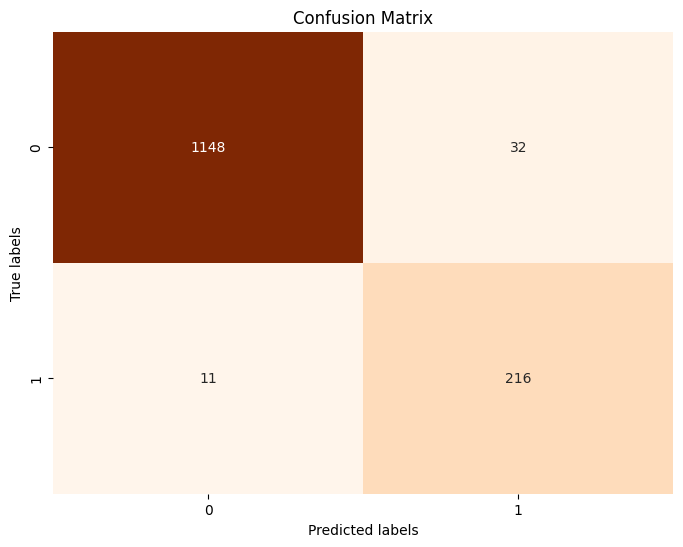

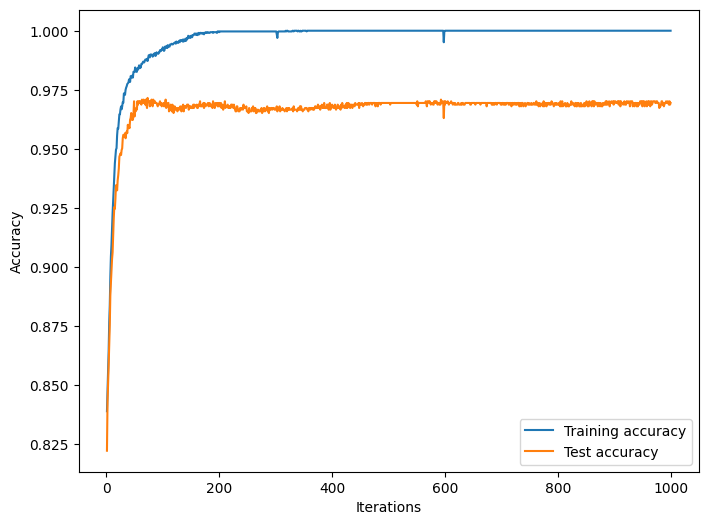

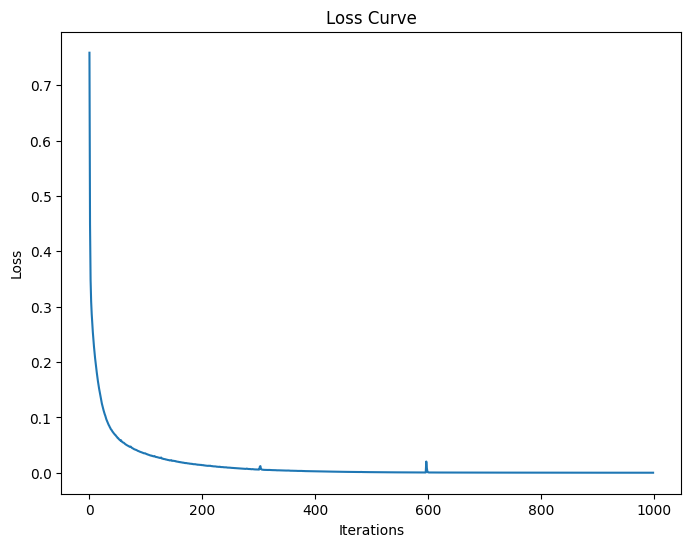

In [34]:
# Next, only trying 1 hidden layer with 100 neurons

# Extract training and test sets once again
X = data.drop(['Neo Reference ID', 'Name', 'Close Approach Date',
               'Epoch Date Close Approach', 'Orbit Determination Date',
               'Orbiting Body', 'Orbit ID', 'Equinox', 'Hazardous'], axis=1)
y = data['Hazardous']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, shuffle=True, stratify=y)

# CHANGE: 1 hidden layers, with 100 neurons
mlp = MLPClassifier(hidden_layer_sizes=(100,), max_iter=1000)

# Repeat steps above from here

# Initilize train/test lists
train_accuracies = []
test_accuracies = []

# Scale
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

# Classifier
for i in range(1000):
    mlp.partial_fit(X_train_scaled, y_train, classes=np.unique(y_train))
    train_accuracies.append(mlp.score(X_train_scaled, y_train))
    test_accuracies.append(mlp.score(X_test_scaled, y_test))

# Overall Accuracy
train_accuracy = mlp.score(X_train_scaled, y_train)
test_accuracy = mlp.score(X_test_scaled, y_test)

print(f"Overall Training Accuracy: {train_accuracy}")
print(f"Overall Test Accuracy: {test_accuracy}")

# Confusion Matrix
y_pred = mlp.predict(X_test_scaled)

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Oranges', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

# Training/Test Accuracy Plot
plt.figure(figsize=(8, 6))
plt.plot(range(1, 1001), train_accuracies, label='Training accuracy')
plt.plot(range(1, 1001), test_accuracies, label='Test accuracy')
plt.xlabel('Iterations')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Loss Curve plot
plt.figure(figsize=(8, 6))
plt.plot(mlp.loss_curve_)
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.title('Loss Curve')
plt.show()

Overall Training Accuracy: 1.0
Overall Test Accuracy: 0.9758351101634684


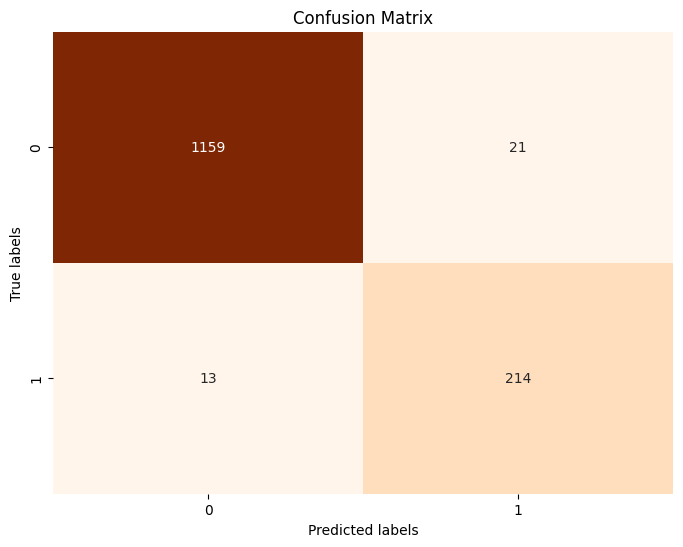

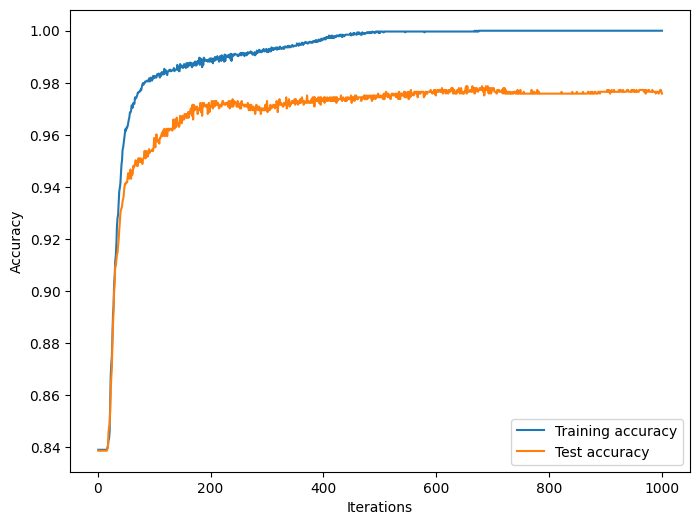

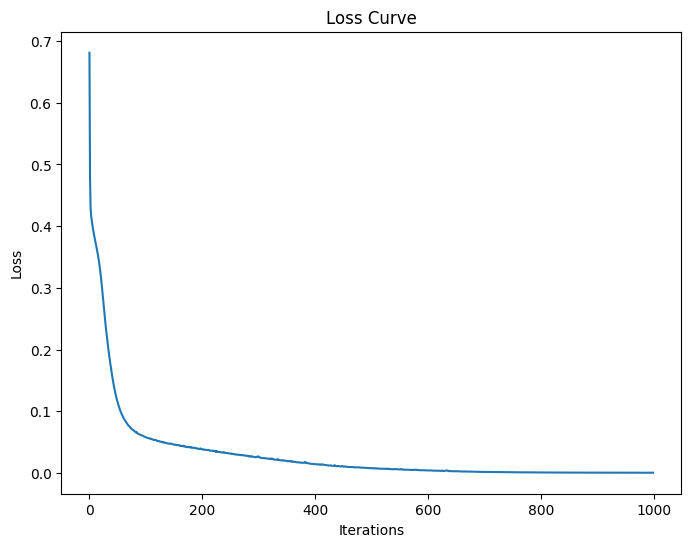

In [35]:
# Finally, changing the activation function

# Extract training and test sets
X = data.drop(['Neo Reference ID', 'Name', 'Close Approach Date',
               'Epoch Date Close Approach', 'Orbit Determination Date',
               'Orbiting Body', 'Orbit ID', 'Equinox', 'Hazardous'], axis=1)
y = data['Hazardous']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, shuffle=True, stratify=y)

# CHANGE: activation function from 'relu' to 'logistic' or sigmoid
# Same number of hidden layers/number of neurons in layers as initial classifier
mlp = MLPClassifier(hidden_layer_sizes=(50,50), max_iter=1000, activation='logistic')

# Repeat steps above from here

# Initilize train/test lists
train_accuracies = []
test_accuracies = []

# Scale
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

# Classifier
for i in range(1000):
    mlp.partial_fit(X_train_scaled, y_train, classes=np.unique(y_train))
    train_accuracies.append(mlp.score(X_train_scaled, y_train))
    test_accuracies.append(mlp.score(X_test_scaled, y_test))

# Overall Accuracy
train_accuracy = mlp.score(X_train_scaled, y_train)
test_accuracy = mlp.score(X_test_scaled, y_test)

print(f"Overall Training Accuracy: {train_accuracy}")
print(f"Overall Test Accuracy: {test_accuracy}")

# Confusion Matrix
y_pred = mlp.predict(X_test_scaled)

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Oranges', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

# Training/Test Accuracy Plot
plt.figure(figsize=(8, 6))
plt.plot(range(1, 1001), train_accuracies, label='Training accuracy')
plt.plot(range(1, 1001), test_accuracies, label='Test accuracy')
plt.xlabel('Iterations')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Loss Curve plot
plt.figure(figsize=(8, 6))
plt.plot(mlp.loss_curve_)
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.title('Loss Curve')
plt.show()

Overall Training Accuracy: 1.0
Overall Test Accuracy: 0.9815209665955935


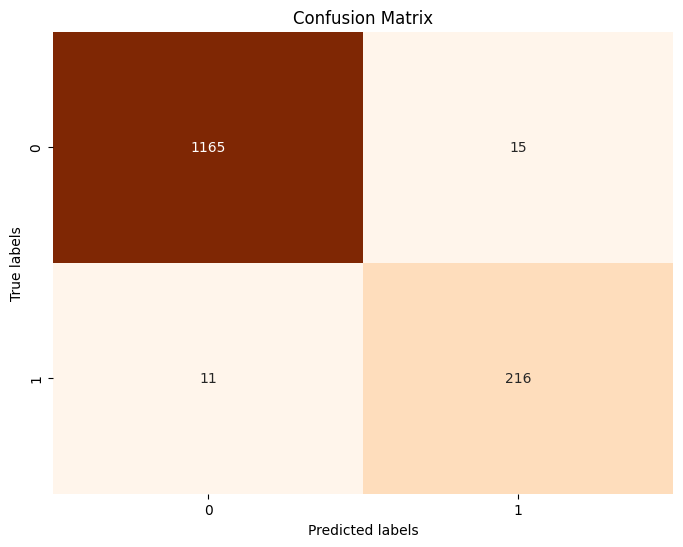

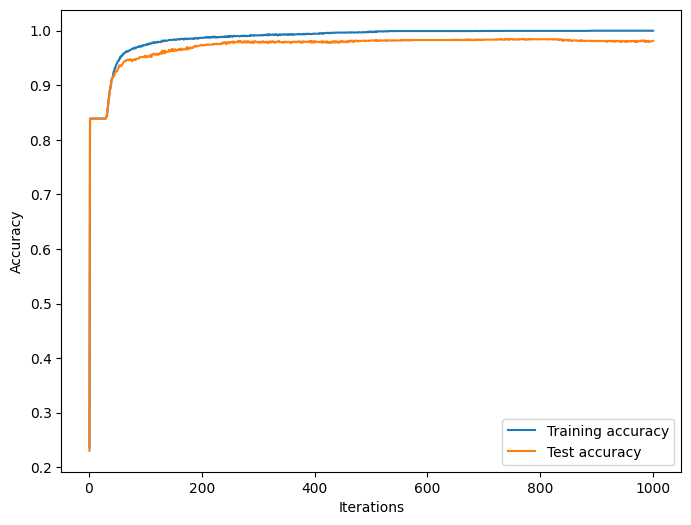

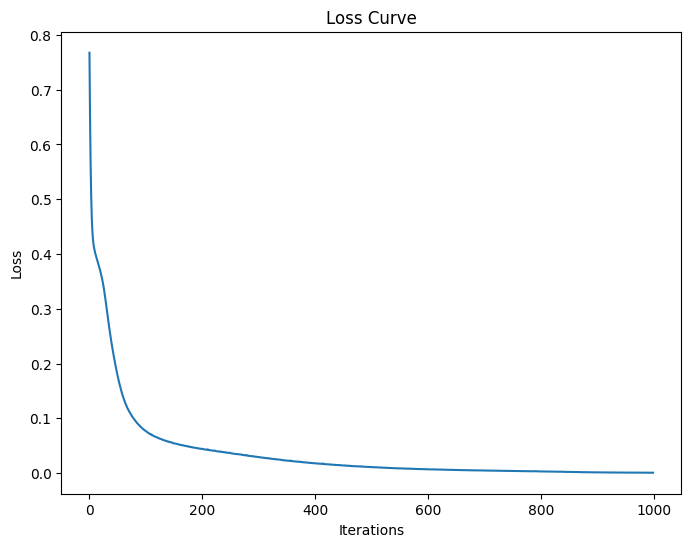

In [38]:
# Extra experiments

# Extract training and test sets once again
X = data.drop(['Neo Reference ID', 'Name', 'Close Approach Date',
               'Epoch Date Close Approach', 'Orbit Determination Date',
               'Orbiting Body', 'Orbit ID', 'Equinox', 'Hazardous'], axis=1)
y = data['Hazardous']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, shuffle=True, stratify=y)

# CHANGE: 2 hidden layers, with 30 and 20 neurons, respectively, with activation 'logistic'
mlp = MLPClassifier(hidden_layer_sizes=(30,20), max_iter=1000, activation='logistic')

# Repeat steps above from here

# Initilize train/test lists
train_accuracies = []
test_accuracies = []

# Scale
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

# Classifier
for i in range(1000):
    mlp.partial_fit(X_train_scaled, y_train, classes=np.unique(y_train))
    train_accuracies.append(mlp.score(X_train_scaled, y_train))
    test_accuracies.append(mlp.score(X_test_scaled, y_test))

# Overall Accuracy
train_accuracy = mlp.score(X_train_scaled, y_train)
test_accuracy = mlp.score(X_test_scaled, y_test)

print(f"Overall Training Accuracy: {train_accuracy}")
print(f"Overall Test Accuracy: {test_accuracy}")

# Confusion Matrix
y_pred = mlp.predict(X_test_scaled)

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Oranges', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

# Training/Test Accuracy Plot
plt.figure(figsize=(8, 6))
plt.plot(range(1, 1001), train_accuracies, label='Training accuracy')
plt.plot(range(1, 1001), test_accuracies, label='Test accuracy')
plt.xlabel('Iterations')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Loss Curve plot
plt.figure(figsize=(8, 6))
plt.plot(mlp.loss_curve_)
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.title('Loss Curve')
plt.show()

Overall Training Accuracy: 1.0
Overall Test Accuracy: 0.9708599857853589


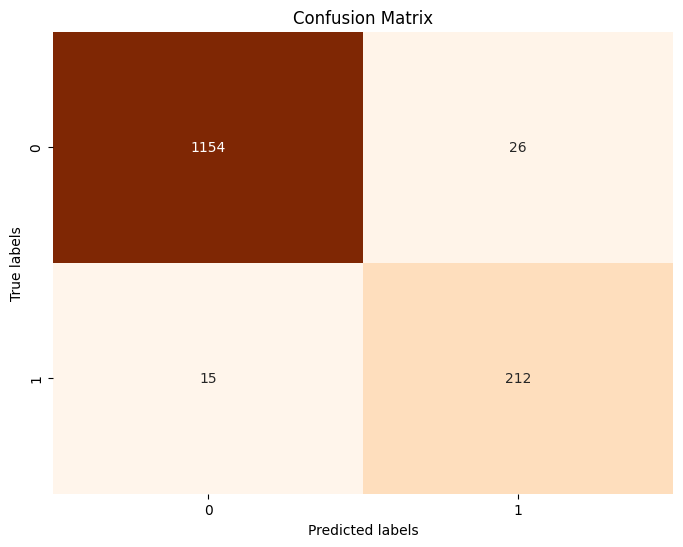

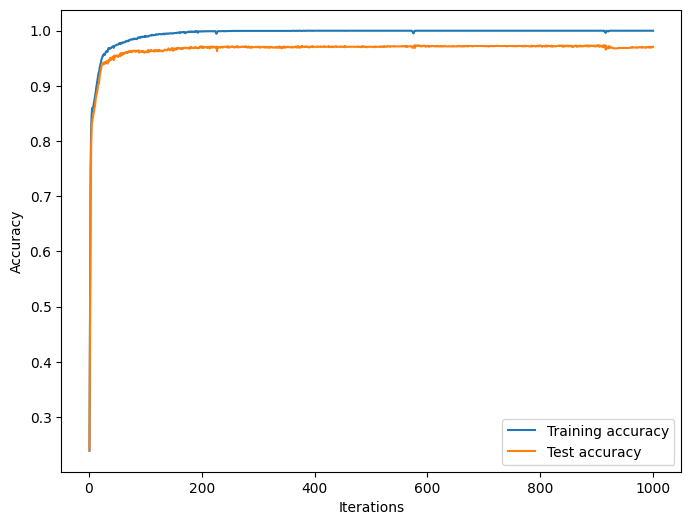

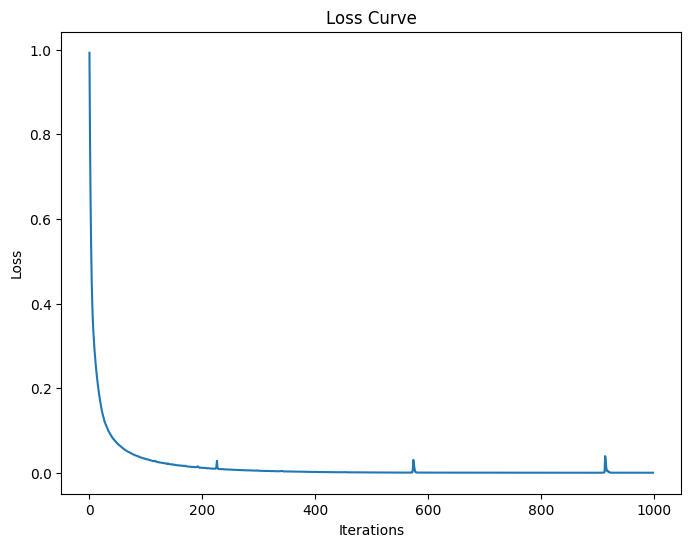

In [51]:
# Extra experiments

# Extract training and test sets once again
X = data.drop(['Neo Reference ID', 'Name', 'Close Approach Date',
               'Epoch Date Close Approach', 'Orbit Determination Date',
               'Orbiting Body', 'Orbit ID', 'Equinox', 'Hazardous'], axis=1)
y = data['Hazardous']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, shuffle=True, stratify=y)

# CHANGE: 2 hidden layers, 10 neurons each
mlp = MLPClassifier(hidden_layer_sizes=(15,15), max_iter=1000)

# Repeat steps above from here

# Initilize train/test lists
train_accuracies = []
test_accuracies = []

# Scale
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

# Classifier
for i in range(1000):
    mlp.partial_fit(X_train_scaled, y_train, classes=np.unique(y_train))
    train_accuracies.append(mlp.score(X_train_scaled, y_train))
    test_accuracies.append(mlp.score(X_test_scaled, y_test))

# Overall Accuracy
train_accuracy = mlp.score(X_train_scaled, y_train)
test_accuracy = mlp.score(X_test_scaled, y_test)

print(f"Overall Training Accuracy: {train_accuracy}")
print(f"Overall Test Accuracy: {test_accuracy}")

# Confusion Matrix
y_pred = mlp.predict(X_test_scaled)

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Oranges', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

# Training/Test Accuracy Plot
plt.figure(figsize=(8, 6))
plt.plot(range(1, 1001), train_accuracies, label='Training accuracy')
plt.plot(range(1, 1001), test_accuracies, label='Test accuracy')
plt.xlabel('Iterations')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Loss Curve plot
plt.figure(figsize=(8, 6))
plt.plot(mlp.loss_curve_)
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.title('Loss Curve')
plt.show()

Overall Training Accuracy: 1.0
Overall Test Accuracy: 0.968727789623312


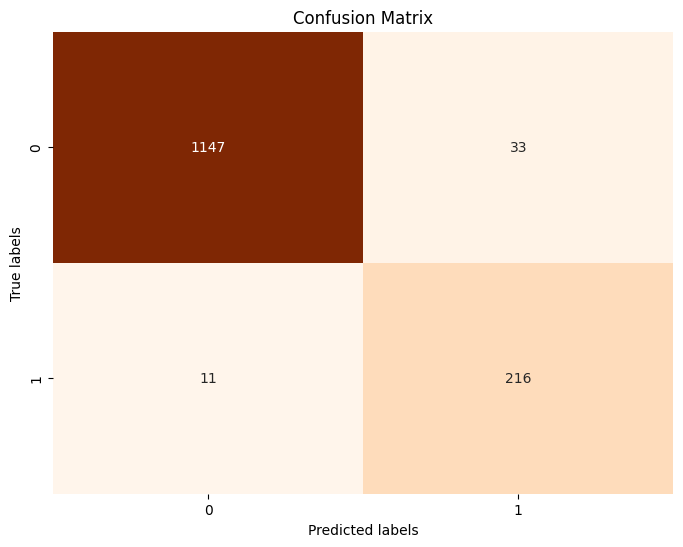

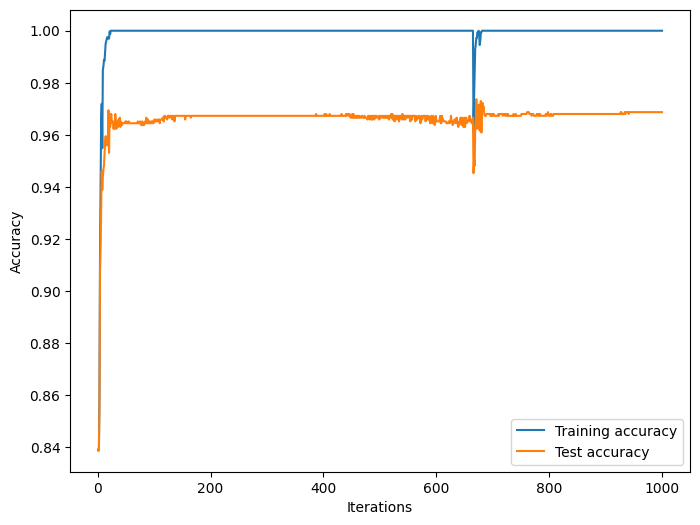

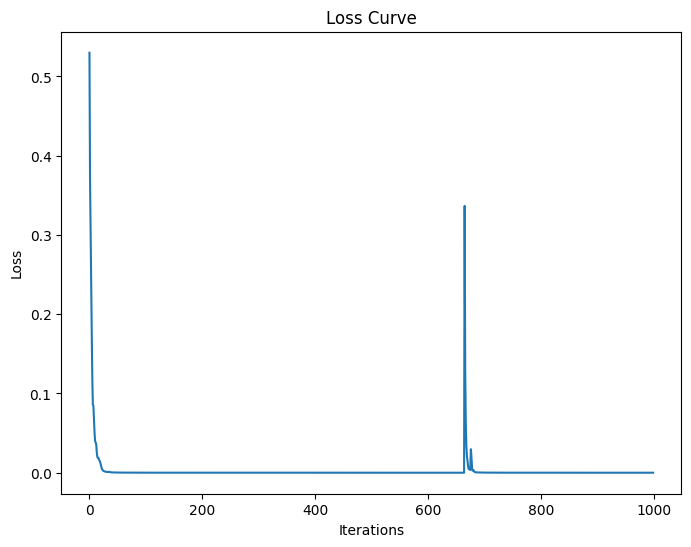

In [55]:
# Extra

# Extract training and test sets once again
X = data.drop(['Neo Reference ID', 'Name', 'Close Approach Date',
               'Epoch Date Close Approach', 'Orbit Determination Date',
               'Orbiting Body', 'Orbit ID', 'Equinox', 'Hazardous'], axis=1)
y = data['Hazardous']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, shuffle=True, stratify=y)


# CHANGE: 5 hidden layers, with 100, 80, 60, 40 and 20 neurons, respectively
mlp = MLPClassifier(hidden_layer_sizes=(100,80,60,40,20), max_iter=1000)

# Repeat steps above from here

# Initilize train/test lists
train_accuracies = []
test_accuracies = []

# Scale
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

# Classifier
for i in range(1000):
    mlp.partial_fit(X_train_scaled, y_train, classes=np.unique(y_train))
    train_accuracies.append(mlp.score(X_train_scaled, y_train))
    test_accuracies.append(mlp.score(X_test_scaled, y_test))

# Overall Accuracy
train_accuracy = mlp.score(X_train_scaled, y_train)
test_accuracy = mlp.score(X_test_scaled, y_test)

print(f"Overall Training Accuracy: {train_accuracy}")
print(f"Overall Test Accuracy: {test_accuracy}")

# Confusion Matrix
y_pred = mlp.predict(X_test_scaled)

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Oranges', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

# Training/Test Accuracy Plot
plt.figure(figsize=(8, 6))
plt.plot(range(1, 1001), train_accuracies, label='Training accuracy')
plt.plot(range(1, 1001), test_accuracies, label='Test accuracy')
plt.xlabel('Iterations')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Loss Curve plot
plt.figure(figsize=(8, 6))
plt.plot(mlp.loss_curve_)
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.title('Loss Curve')
plt.show()